# Лабораторная работа №4
## ПОСТРОЕНИЕ ТИПОВЫХ МОДЕЛЕЙ АРПСС (ARIMA)
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

Для начала попробуем создать собственные АРПСС ряды первого и второго порядков и изучить их автокорреляционные функции.
Создадим два АР(1) процесса первого порядка:
$$z_{t}=0.8z_{t-1}+a_{t}$$
$$z_{t}=-0.8z_{t-1}+a_{t}$$
где $a_{t}$-случайная нормально распределенная величина малой амплитуды (порядка 0.2), $z_{0}=1$


In [3]:
z1 = np.zeros(100)
z2 = np.zeros(100)

z1[0] = 1
z2[0] = 1

for i in range(1,100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()

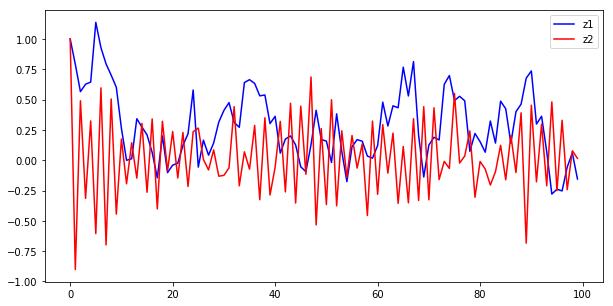

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b', label = 'z1')
plt.plot(z2, 'r', label = 'z2')
plt.legend()
plt.show()

Постройте для этих рядов функции автокорреляции с помощью функции `plot_acf`:

<Figure size 720x360 with 0 Axes>

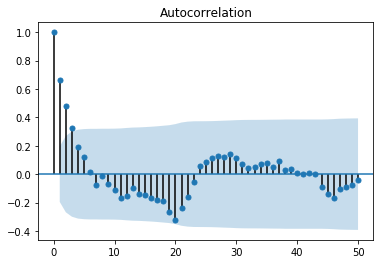

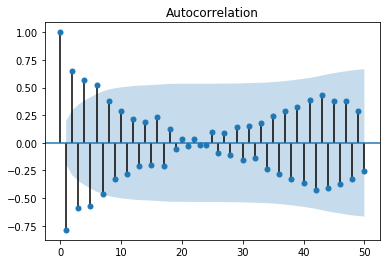

In [5]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

Сравните эти графики между собой: найдите их сходства и различия, а также характерные особенности, которые позволяют отнести их к модели АР первого порядка. Оцените весовой параметр этих процессов (как если бы Вы не знали о них) с помощью формулы $\phi=\rho_{1}$, на основе функции автокорреляции. Также удостоверьтесь, что для модели АР(1) коэффициенты
автокорреляции изменяются по степенному закону $\rho(l)=\phi^{l}$


__Для первого ряда $z_{t}=0.8z_{t-1}+a_{t}$:__
- $\rho(0)=0.8^{0}=1$ 
- $\rho(1)=0.8^{1}=0.8$ 
- $\rho(2)=0.8^{2}=0.64$ 
- $\rho(3)=0.8^{3}=0.512$ ...

__Для второго ряда $z_{t}=-0.8z_{t-1}+a_{t}$: __
- $\rho(0)=-0.8^{0}=1$ 
- $\rho(1)=-0.8^{1}=-0.8$ 
- $\rho(2)=-0.8^{2}=0.64$
- $\rho(3)=-0.8^{3}=-0.512$ __... - он знакопеременный.__


Аналогичным образом постройте два СС(1) процесса среднегоскользящего первого порядка:
$$z_{t}=a_{t}-0.8a_{t-1}$$
$$z_{t}=a_{t}-(-0.8)a_{t-1}$$
где $a_{t}$-случайная нормально распределенная величина

In [6]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]

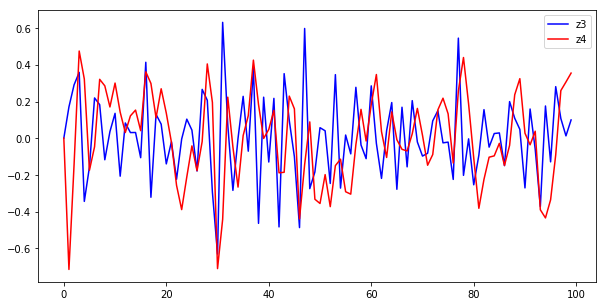

In [7]:
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b', label = 'z3')
plt.plot(z4, 'r', label = 'z4')
plt.legend()
plt.show()

Постройте для этих рядов функции автокорреляции, достаточно взять 25 лагов (четверть от длины ряда)

<Figure size 720x360 with 0 Axes>

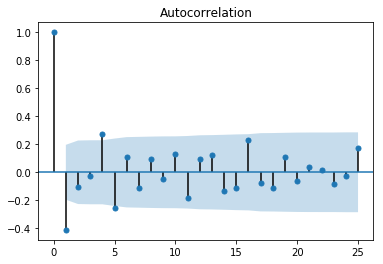

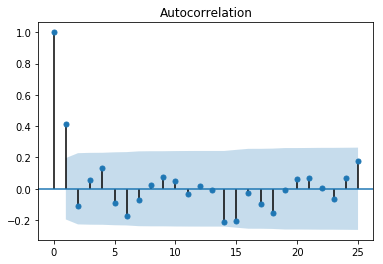

In [8]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

Сравните эти графики между собой: найдите их сходства и различия, а также характерные особенности, которые позволяют отнести их к модели СС первого порядка. Оцените весовой параметр этих процессов (как если бы Вы не знали о них) с помощью формулы ниже, на основе функции автокорреляции.
$$\theta_{1}^{2}+\theta_{1}/\rho_{1}+1=0$$
$$|\theta_{1}|<1$$
Также удостоверьтесь, что для модели СС(1) коэффициенты автокорреляции соответствуют формуле
\begin{equation}
  \rho_{k}=
    \begin{cases}
      \frac{-\theta_{1}}{1+\theta_{1}^2} &  , k=1\\
      0 &, k \ge 2 \\
    \end{cases}       
\end{equation}


__Для первого ряда $z_{t}=a_{t}-0.8a_{t-1}$:__
- $\rho(0)=0.8^{0}=1$ 
- $\rho(1)=0.8^{1}=-0.5$
- $\theta_{1}=1$ 
- $\rho_{1} = \frac{-1}{1+1^2} = -0.5$


__Для второго ряда $z_{t}=a_{t}-(-0.8)a_{t-1}$: __
- $\rho(0)=0.8^{0}=1$ 
- $\rho(1)=0.8^{1}=0.5$
- $\theta_{1}=-1$ 
- $\rho_{1} = \frac{-(-1)}{1+(-1)^2} = 0.5$




Наконец, создайте временной ряд процесса АРСС(1, 1):
$$z_{t}=0.8z_{t-1}+a_{t}-0.3a_{t-1}$$
$$z_{t}=-0.8z_{t-1}+a_{t}-0.3a_{t-1}$$
где $a_{t}$-случайная нормально распределенная величина малой амплитуды, $z_{0}=1$

In [9]:
z5 = np.zeros(100)
z6 = np.zeros(100)    
z5[0] = 1
z6[0] = 1
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z5[i] =  0.8 * z1[i - 1] + ar[i] - 0.3 * ar[i - 1]
    z6[i] = -0.8 * z1[i - 1] + ar[i] - 0.3 * ar[i - 1]

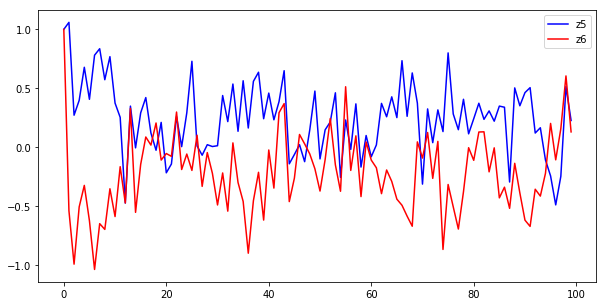

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(z5, 'b', label = 'z5')
plt.plot(z6, 'r', label = 'z6')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

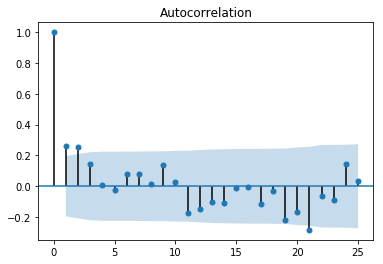

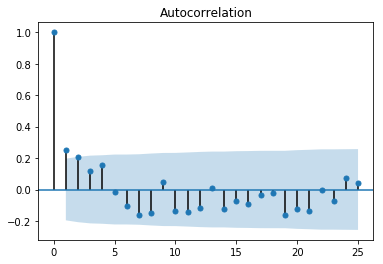

In [11]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=25)
plot_acf(z6, lags=25)
plt.show()

Есть и другой, более высокоуровневый способ генерации рядов АРПСС. Используем следующую функцию для создания АРСС (2, 2):

In [12]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

In [13]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45]


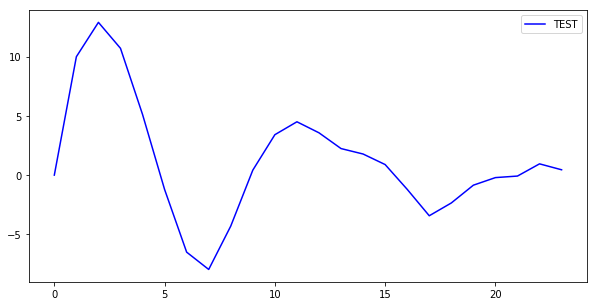

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(TEST, 'b', label = 'TEST')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

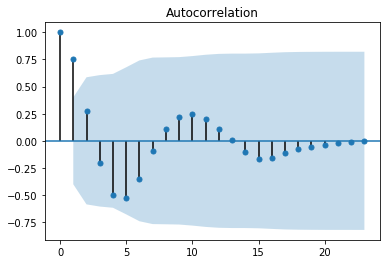

In [15]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=23)
plt.show()

ВР, в достаточной степени, __стационарен__, а, так как, эта функция является __знакопеременной__, то один из членов АР модели имеет отрицательный вес.

Создадим три пробные модели АРПСС для проверки ряда на 
- АР(1) = АРПСС(1, 0, 0)
- АР(2)
- АР(3), без тренда (trend = ‘nc’):

In [16]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Sun, 24 Mar 2019   AIC                            128.850
Time:                        23:46:22   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

In [17]:
arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(2, 0)   Log Likelihood                 -41.543
Method:                       css-mle   S.D. of innovations              1.201
Date:                Sun, 24 Mar 2019   AIC                             89.086
Time:                        23:46:22   BIC                             92.620
Sample:                             0   HQIC                            90.024
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.5108      0.056     27.117      0.000       1.402       1.620
ar.L2.y       -0.9641      0.035    -27.510      0.000      -1.033      -0.895
                                    Roots           

In [18]:
arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(3, 0)   Log Likelihood                 -41.097
Method:                       css-mle   S.D. of innovations              1.172
Date:                Sun, 24 Mar 2019   AIC                             90.193
Time:                        23:46:22   BIC                             94.906
Sample:                             0   HQIC                            91.443
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.7184      0.222      7.756      0.000       1.284       2.153
ar.L2.y       -1.2995      0.345     -3.770      0.001      -1.975      -0.624
ar.L3.y        0.2216      0.229      0.968      0.3

### Выбор наилучшей модели 
__AIC__ – информационный критерий Акаике, который показывает максимальное правдоподобие модели при штрафовании за избыточные параметры системы. Считается, что наилучшей будет модель с наименьшим значением критерия AIC.
- ARIMA1 AIC 128.850
- __ARIMA2 AIC  89.086__
- ARIMA3 AIC  90.193

__BIC__ – Байесовский информационный критерий,модификация AIC. Данный критерий налагает больший штраф на увеличение количества параметров по сравнению с AIC.
- ARIMA1 BIC 131.206
- __ARIMA2 BIC  92.620__
- ARIMA3 BIC  94.906

__HQIC__ –информационный критерий Ханнана-Куинна (Hannan-Quinn), который асимптотически более точный метод чем BIC для дискретных параметров. 
- ARIMA1 HQIC 129.475
- __ARIMA2 HQIC  90.024__
- ARIMA3 HQIC  91.443

В любом случае, лучшей моделью будет та, что имеет наименьшее значение информационного критерия среди множества других. Рекомендуется, в первую очередь, выбирать по критерию __BIC__, так как он сильнее штрафует за переобучение модели и увеличение числа параметров по сравнению с другими. В нашем случае для тестового ВР, для любых информационных критериев, это модель АР(2).

Другим методом выбора модели может служить построение моделей АРПСС выбранного порядка и с найденными коэффициентам на графиках совмещенно. 

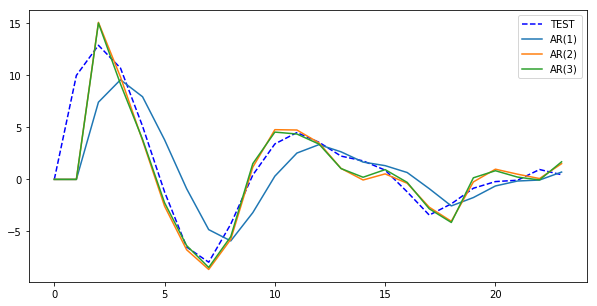

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(TEST, 'b--', label = 'TEST')
plt.plot(model_fit1.fittedvalues, label = 'AR(1)')
plt.plot(model_fit2.fittedvalues, label = 'AR(2)')
plt.plot(model_fit3.fittedvalues, label = 'AR(3)')
plt.legend()
plt.show()

Модель АР(1) совсем слабо подходит к ВР, АР(2) и АР(3) близки, АР(3) почти не отличается от АР(2), но избыточен по числе параметров (3>2), а значит __АР(2)__ является наиболее оптимальной моделью ВР.

Теперь попробуйте найти весовые коэффициенты для АР моделей только 1 и 2 порядка самостоятельно. Для этого Вам потребуется построить автокорреляционную функцию этого ряда. Для нахождения весового коэффициента АР(1) используйте следующую формулу: 
$$\phi = \rho_{1}$$
где $\rho_{1} - r(1)$ оценка автокорреляционной функции. 

Для АР(2) используйте следующие формулы аналогичным
образом:
$$\phi_{1} = \frac{\rho_{1}(1-\rho_{2})}{1-\rho_{1}^2}$$
$$\phi_{2} = \frac{\rho_{2}-\rho_{1}^2}{1-\rho_{1}^2}$$

__Для AP(1):__
- $\phi = \rho_{1} = 0.7550097626743364$

__Для AP(2):__
- $\phi_{1} = 1.2777374692491614$
- $\phi_{1} = 1.510812912063498$               (model_fit2.arparams[0])
- $\phi_{2} = -0.692345625735037$
- $\phi_{2} = -0.9640757053859448$             (model_fit2.arparams[1])



<Figure size 720x360 with 0 Axes>

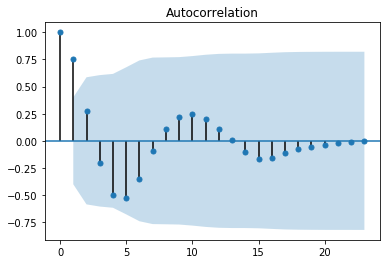

In [20]:
plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=23)
plt.show()

In [21]:
rho1 = acf(TEST, nlags=23)[1]
rho2 = acf(TEST, nlags=23)[2]

In [22]:
phi1 = rho1*(1-rho2)/(1-rho1*rho1)
print(phi1)
print(model_fit2.arparams[0])

1.2777374692491614
1.510812912063498


In [23]:
phi2 = (rho2-rho1*rho1)/(1-rho1*rho1)
print(phi2)
print(model_fit2.arparams[1])

-0.692345625735037
-0.9640757053859448


Теперь в зависимости от своего варианта, который определяется по последним двум цифрам студ. билета, выберите из выданных преподавателей mat-файлов тот, который имеет номер Вашего варианта и загрузите из него временной ряд Z, например:

In [24]:
file = h5py.File('9.mat', 'r')
data = file.get('z9')
Z = np.array(data)

In [25]:
Z.shape

(128, 1)

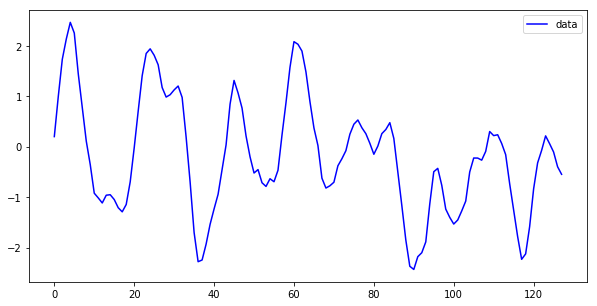

In [26]:
plt.figure(figsize = (10, 5))
plt.plot(Z, 'b', label = 'data')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

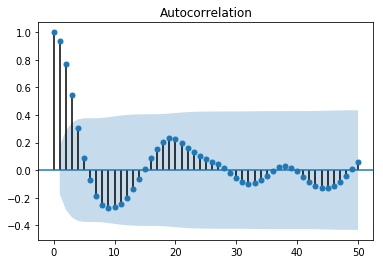

In [27]:
plt.figure(figsize = (10, 5))
plot_acf(Z, lags=50)
plt.show()

Оцените порядок АРСС модели с помощью класса ARIMA. Для упрощения задачи выбора модели используйте только чистые АР или СС модели, то есть класс ARIMA c order = (p, 0, 0) или order = (0, 0, q).

In [28]:
arimaZ100 = ARIMA(Z, order = (1, 0, 0))
model_fitZ100 = arimaZ100.fit(disp = False, trend='nc')

arimaZ200 = ARIMA(Z, order = (2, 0, 0))
model_fitZ200 = arimaZ200.fit(disp = False, trend='nc')

print("(1,0,0) ", model_fitZ100.bic)
print("(2,0,0) ", model_fitZ200.bic)
#The computed initial AR coefficients are not stationary

(1,0,0)  142.1736409709436
(2,0,0)  -9.924432134491706


In [29]:
arimaZ001 = ARIMA(Z, order = (0, 0, 1))
model_fitZ001 = arimaZ001.fit(disp = False, trend='nc')
print("(0,0,1) ", model_fitZ001.bic)

#The computed initial MA coefficients are not invertible

(0,0,1)  245.87013626591911


In [30]:
print(model_fitZ100.summary())
print(model_fitZ200.summary())
print(model_fitZ001.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                 -66.235
Method:                       css-mle   S.D. of innovations              0.403
Date:                Sun, 24 Mar 2019   AIC                            136.470
Time:                        23:46:29   BIC                            142.174
Sample:                             0   HQIC                           138.787
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9309      0.030     31.515      0.000       0.873       0.989
                                    Roots                                    
                  Real          Imaginary           M

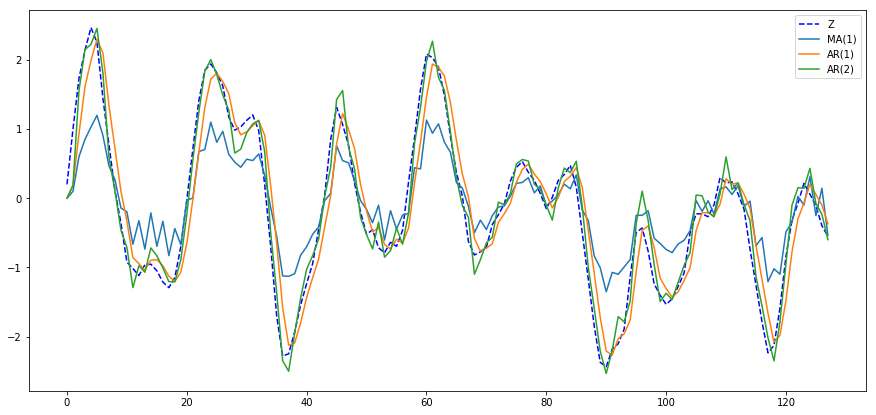

In [31]:
plt.figure(figsize = (15, 7))
plt.plot(Z, 'b--', label = 'Z')
plt.plot(model_fitZ001.fittedvalues, label = 'MA(1)')
plt.plot(model_fitZ100.fittedvalues, label = 'AR(1)')
plt.plot(model_fitZ200.fittedvalues, label = 'AR(2)')
plt.legend()
plt.show()

In [32]:
rhoZ1 = acf(Z, nlags=25)[1]
rhoZ2 = acf(TEST, nlags=25)[2]

phi1 = rho1*(1-rho2)/(1-rho1*rho1)
print(phi1)
print(model_fitZ200.arparams[0])

phi2 = (rho2-rho1*rho1)/(1-rho1*rho1)
print(phi2)
print(model_fitZ200.arparams[1])

1.2777374692491614
1.727005268643307
-0.692345625735037
-0.8452744360359389


В дальнейшем попробуйте подобрать такую модель АРПСС (ARIMA) со всевозможными параметрами order = (p, d, q), которая будет наилучшей для данного ВР среди всех других по одному из информационных критериев.

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
%%time
p_values = range(0,10)
d_values = range(0,3)
q_values = range(0,10)
best_BIC = 1000
best_order = (0,0,0)
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                arima = ARIMA(Z, order)
                model_fit = arima.fit(disp = False, trend='nc')
                BIC = model_fit.bic
                #print("BIC ", BIC, " order ", order, " ", model_fit.arparams)
                if BIC < best_BIC:
                    best_BIC = BIC
                    best_order = order
            except:
                continue

Wall time: 6min 54s


In [35]:
print("BIC ", best_BIC, " order ", best_order)

BIC  -9.924432134491706  order  (2, 0, 0)


__Wall time: 6min 54s__

__BIC  -9.924432134491706  order  (2, 0, 0)__